# Aula 5
## Transformações geométricas
As transformações geométricas são aquelas cujo efeito é a **alteração da posição espacial dos pixels** que compõem uma imagem.
As principais operações são:
* Translação;
* Reflexão;
* Cisalhamento;
* Rotação;
* Escala.

(240, 240, 3)


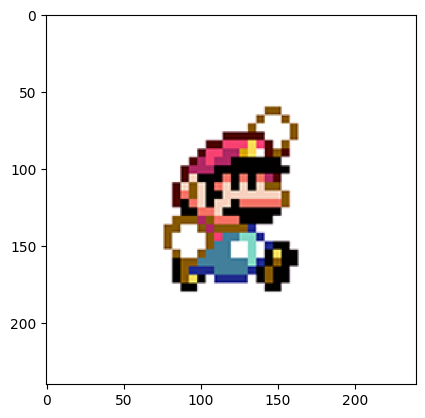

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

mario = np.array(Image.open('mario.png'))[:, :, :3]
(l, c, p) = mario.shape
print(mario.shape)
plt.imshow(mario)

## Translação
* Transladar uma imagem significa mover todos os pixels para uma nova coordenada;
* Pode ser realizada adicionando um valor às suas coordenadas.

$$\begin{pmatrix}
  x' \\ y'
\end{pmatrix} = \begin{pmatrix}
  x \\ y
\end{pmatrix} + \begin{pmatrix}
  d_x \\ d_y
\end{pmatrix}$$

### Translação (subarray, iterativo)

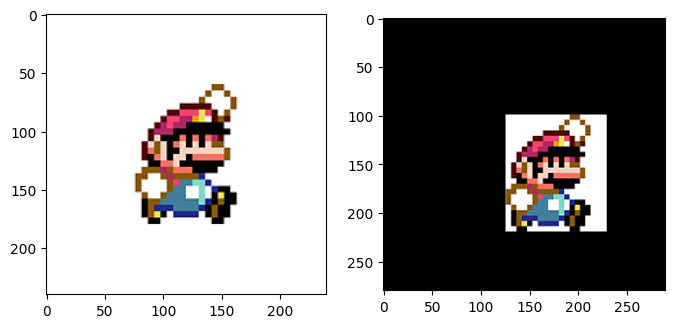

In [13]:
(dx, dy) = (50, 40)
(mario_start_x, mario_start_y, mario_end_x, mario_end_y) = (76, 60, 180, 180)
mario_tr = np.zeros(shape=(l + dy, c + dx, p), dtype=np.uint8) # Fundo preto.
for i in range(mario_start_y, mario_end_y):
    for j in range(mario_start_x, mario_end_x):
        new_x = j + dx
        new_y = i + dy
        mario_tr[new_y, new_x ] = mario[i, j]

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1) #(nrows,ncol,index)
plt.imshow(mario)
plt.subplot(2, 2, 2)
plt.imshow(mario_tr)

### Translação (subarray, NumPy)

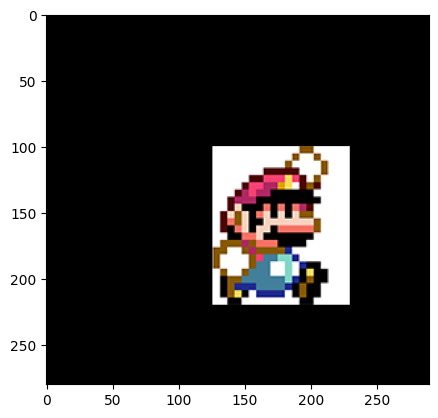

In [14]:
(dx, dy) = (50, 40)
(mario_start_x, mario_start_y, mario_end_x, mario_end_y) = (76, 60, 180, 180)
mario_tr = np.zeros(shape=(l + dy, c + dx, p), dtype=np.uint8) # Fundo preto.
mario_tr[mario_start_y + dy:mario_end_y + dy,
            mario_start_x + dx:mario_end_x + dx] = mario[mario_start_y:mario_end_y,
                                                         mario_start_x:mario_end_x]
plt.imshow(mario_tr)

### Translação (imagem inteira, iterativo)

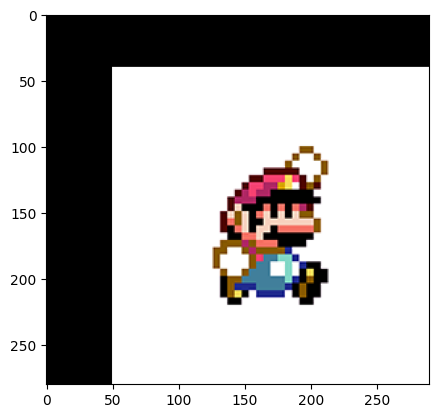

In [15]:
(dx, dy) = (50, 40)
mario_tr = np.zeros(shape=(l + dy, c + dx, p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = j + dx
        new_y = i + dy
        mario_tr[new_y, new_x] = mario[i, j]

plt.imshow(mario_tr)

### Translação (imagem inteira, NumPy)

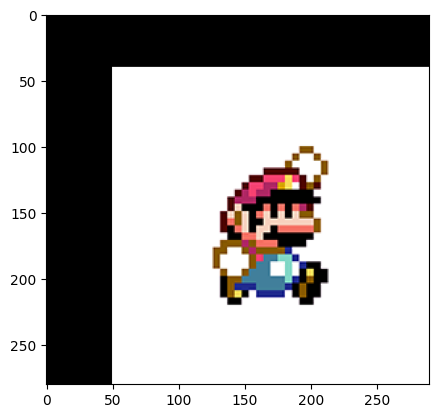

In [16]:
(dx, dy) = (50, 40)
mario_tr = np.zeros(shape=(l + dy, c + dx, p), dtype=np.uint8)
mario_tr[dy:l + dy, dx:c + dx] = mario # ou mario[:, :]
plt.imshow(mario_tr)

## Reflexão
* Refletir uma imagem é espelhar ela em relação a um eixo;
* Em outras palavras, a imagem resultante é como se a original fosse vista reproduzida por um espelho.

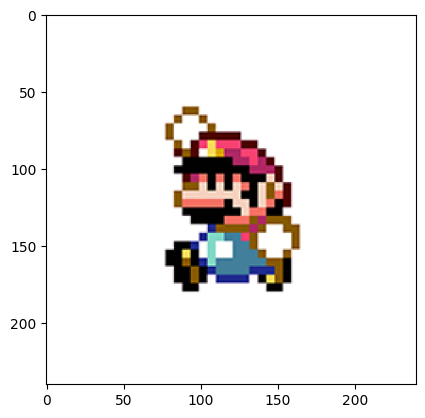

In [17]:
# Reflexão em y:
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        mario_refl[new_y, new_x] = mario[i, j]

plt.imshow(mario_refl)

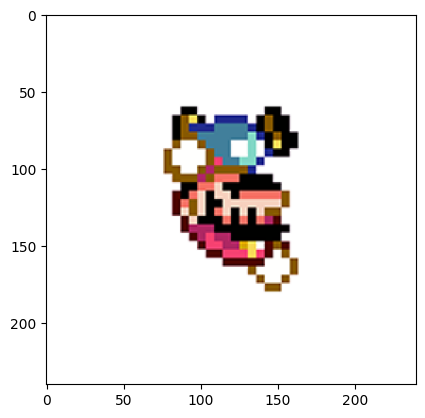

In [18]:
# Reflexão em x:
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
# Acesso a índices: começo:fim:passo
# Logo: ::-1 significa do começo ao fim com passo -1 (de trás para frente)
mario_refl[::-1, ::1] = mario # ou mario[:, :]
plt.imshow(mario_refl)

## Cisalhamento
* Cisalhar uma imagem é realizar uma distorção nela, dando um efeito de *itálico*;
* A distorção ocorre ponto-a-ponto, ao aplicar-se um deslocamento à coordenada x ou y proporcional ao valor da coordenada y ou x, respectivamente;
* Isto é, y' é influenciado por x e x' é influenciado por y.

$$\begin{pmatrix}
  x' \\ y'
\end{pmatrix} = \begin{pmatrix}
  1 & b_x \\ b_y & 1
\end{pmatrix} \cdot \begin{pmatrix}
  x \\ y
\end{pmatrix}$$
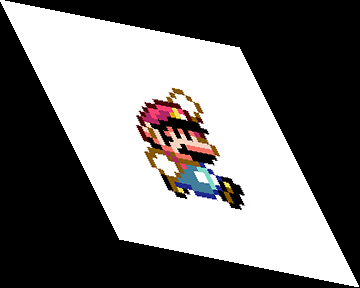

## Rotação
* Rotacionar uma imagem significa girar esta mesma imagem em α, podendo ser em graus ou radianos;
* A rotação pode ser feita a partir da origem ou de um ponto;
* Numa rotação sem interpolação pode ocorrer ausência de pixels, e em rotações em ângulos não-múltiplos de 90° pode ocorrer aliasing.

$$\begin{pmatrix}
  x' \\ y'
\end{pmatrix} = \begin{pmatrix}
  \cos\alpha & -\sin\alpha \\ \sin\alpha & \cos\alpha
\end{pmatrix} \cdot \begin{pmatrix}
  x \\ y
\end{pmatrix}$$

### Rotação

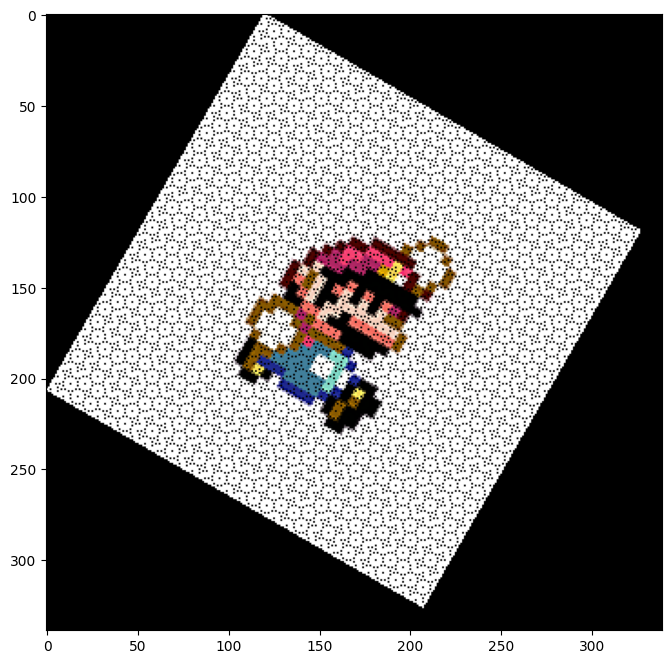

In [19]:
alpha = np.pi / 6 # 30°

ls, cs = int(l * np.sqrt(2)), int(c * np.sqrt(2))
mario_rot = np.zeros((ls, cs, p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        x = j
        y = i
        
        new_x = int(x * np.cos(alpha) - y * np.sin(alpha) +l/2)
        new_y = int(x * np.sin(alpha) + y * np.cos(alpha))
        
        mario_rot[new_y, new_x] = mario[i, j]

plt.figure(figsize=(8, 8))
plt.imshow(mario_rot)

### Rotação (interpolação)

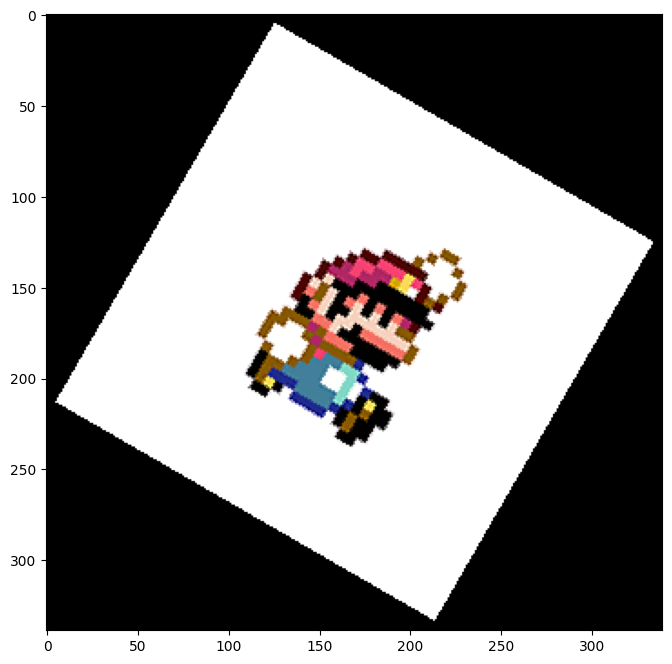

In [20]:
alpha = np.pi / 6 # 30°

ls, cs = int(l * np.sqrt(2)), int(c * np.sqrt(2))
mario_rot = np.zeros((ls, cs, p), dtype=np.uint8)
for i in range(ls):
    for j in range(cs):
        cx = j - (ls / 2)
        cy = i - (cs / 2)
        
        new_x = int( cx * np.cos(alpha) + cy * np.sin(alpha) + l / 2)
        new_y = int(-cx * np.sin(alpha) + cy * np.cos(alpha) + c / 2)
        
        # Pegar apenas a imagem do Mario na original.
        if 0 <= new_x < c and 0 <= new_y < l:
            mario_rot[i, j] = mario[new_y, new_x]

plt.figure(figsize=(8, 8))
plt.imshow(mario_rot)

Referência: https://www.mathworks.com/matlabcentral/answers/34102-how-to-rotate-an-image-using-interpolation

## Escala
* Escalonar uma imagem é mudar as dimensões da mesma;
* Em outras palavras, a imagem ou é "esticada" ou é "encolhida";
* A mudança de escalda ocorre pelo produto das coordenadas dos pixels pelo fator de escala.

$$\begin{pmatrix}
  x' \\ y'
\end{pmatrix} = \begin{pmatrix}
  s_x & 0 \\ 0 & s_y
\end{pmatrix} \cdot \begin{pmatrix}
  x \\ y
\end{pmatrix}$$

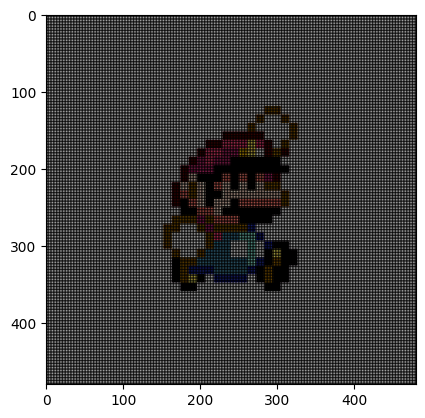

In [21]:
scale_x, scale_y = 2, 2
mario_scale = np.zeros(shape=(l * scale_y, c * scale_x, p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = np.round(j * scale_x)
        new_y = np.round(i * scale_y)
        mario_scale[new_y, new_x] = mario[i, j]

plt.imshow(mario_scale)
Image.fromarray(mario_scale).save('mario_scale.png')

* Para resolver o problema de ausência de pixels, faz-se uso da **interpolação**;
* Objetivo é determinar valores desconhecidos a partir dos conhecidos. O resultado estará dentro da faixa de valores conhecidos;
* Algumas técnicas incluem: nearest neighbor, interpolação linear, interpolação bilinear, interpolação bicúbica etc.

### Nearest neighbor
* Vizinho mais próximo;
* Neste método, é adotado que para cada pixel **i, j** da imagem resultante, o valor do vizinho (que fora perdido) corresponde ao do seu vizinho.
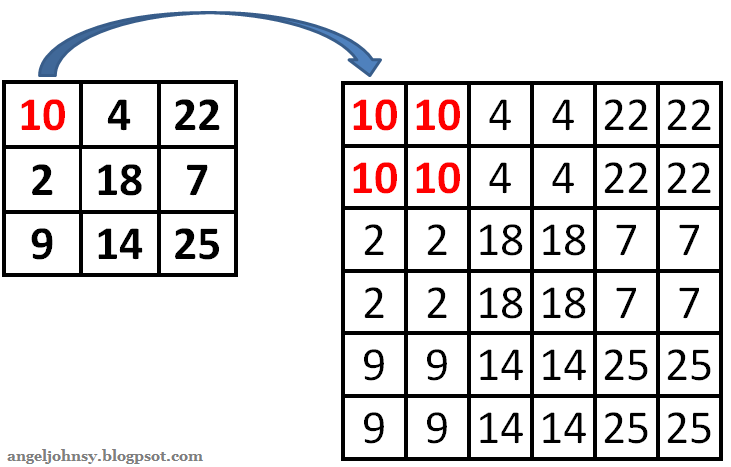

Se a imagem de entrada, $I$, é $L_{entrada}×C_{entrada}$ e a imagem de saída, $J$, é $L_{saída}×C_{saída}$, então a coordenada do pixel de saída $(l_{saída}, c_{saída})$ é amostrada da coordenada de entrada $(l, c)$ onde
$$l=\lfloor{l_f}\rfloor,$$
$$c=\lfloor{c_f}\rfloor,$$
$$l_f=l_{saída}(L_{entrada}/L_{saída}),$$
$$c_f=c_{saída}(C_{entrada}/C_{saída}).$$

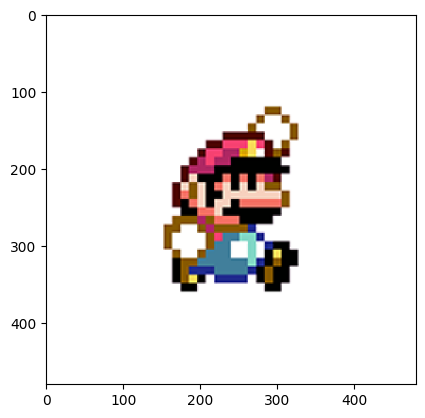

In [22]:
ls, cs = l * 2, c * 2
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
        
plt.imshow(mario_nn)

## Interpolação bilinear
* Neste método, cada pixel **i, j** da imagem resultante corresponde à média ponderada dos quatro pixels vizinhos correspondentes da imagem original.

Seja $I$ a imagem de entrada $L_{entrada}×C_{entrada}$ e $J$ a imagem de saída $L_{saída}×C_{saída}.$

Seja $s_L = L_{entrada}/L_{saída}$ e $s_C = C_{entrada}/C_{saída}.$

Seja $l_f = l \cdot s_L$ para $r=0,\ldots,R_{saída}-1$ e $c_f = c \cdot s_C$ para $c=0,\ldots,C_{saída}-1.$

Seja $r_0 = \lfloor{l_f}\rfloor$ e $c=\lfloor{c_f}\rfloor.$

Seja $\Delta_l = l_f - l_0$ e $\Delta_c = c_f - c_0.$

Então $J(l, c)$
$$=I(l_0, c_0) \cdot (1-\Delta_l) \cdot (1-\Delta_c)$$
$$+I(l_0+1, c_0) \cdot \Delta_l \cdot (1-\Delta_c)$$
$$+I(l_0, c_0+1) \cdot (1-\Delta_l) \cdot \Delta_c$$
$$+I(l_0+1, c_0+1) \cdot \Delta_l \cdot \Delta_c.$$
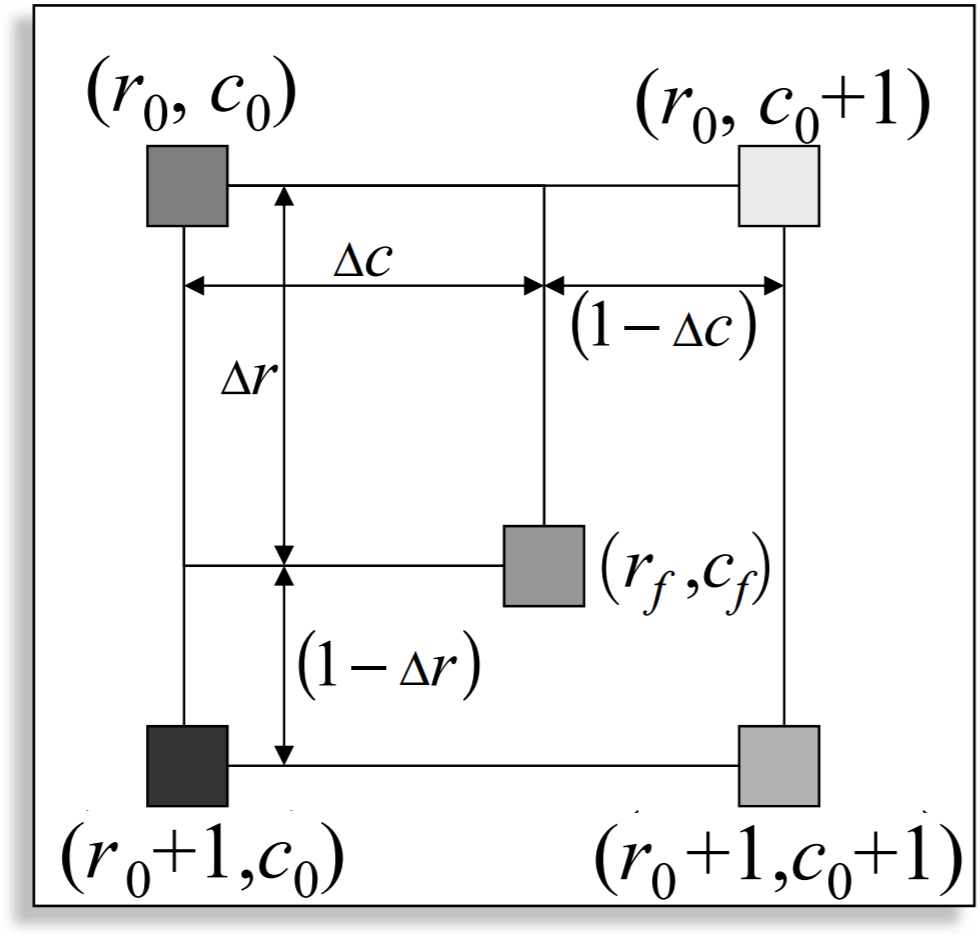

Referência: https://ia802707.us.archive.org/23/items/Lectures_on_Image_Processing/EECE_4353_15_Resampling.pdf

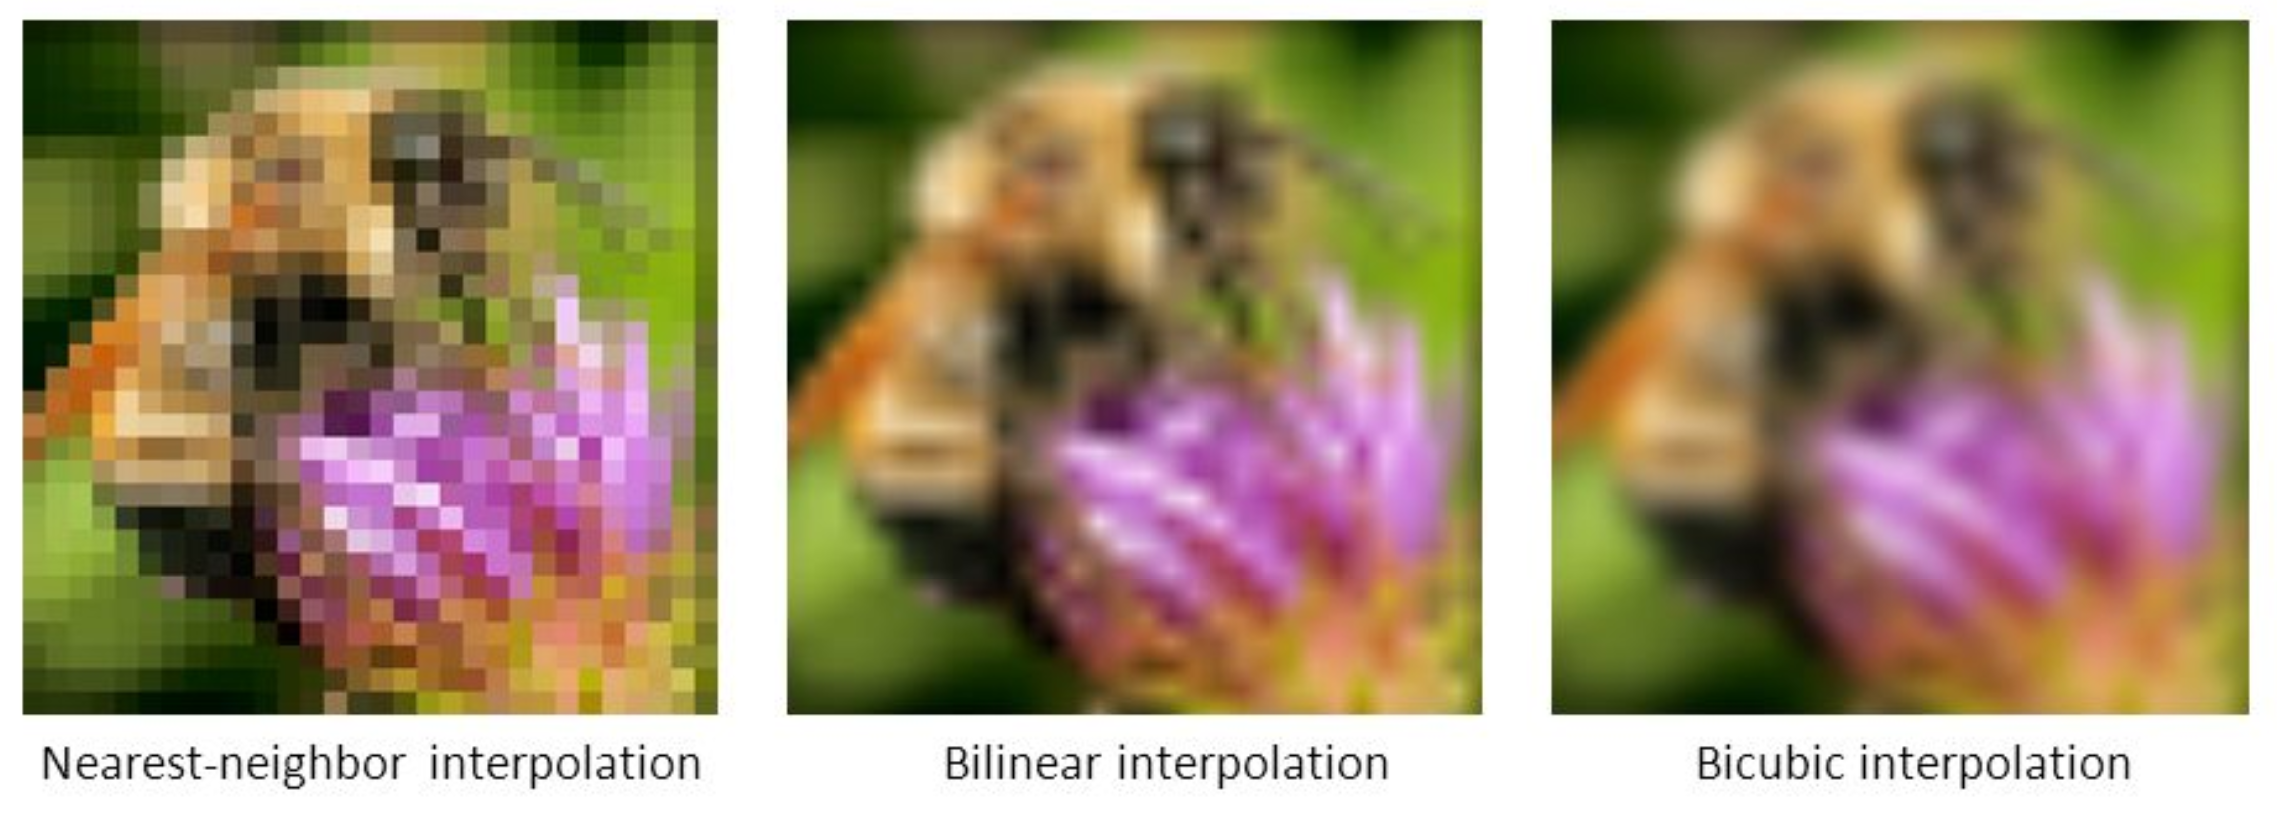
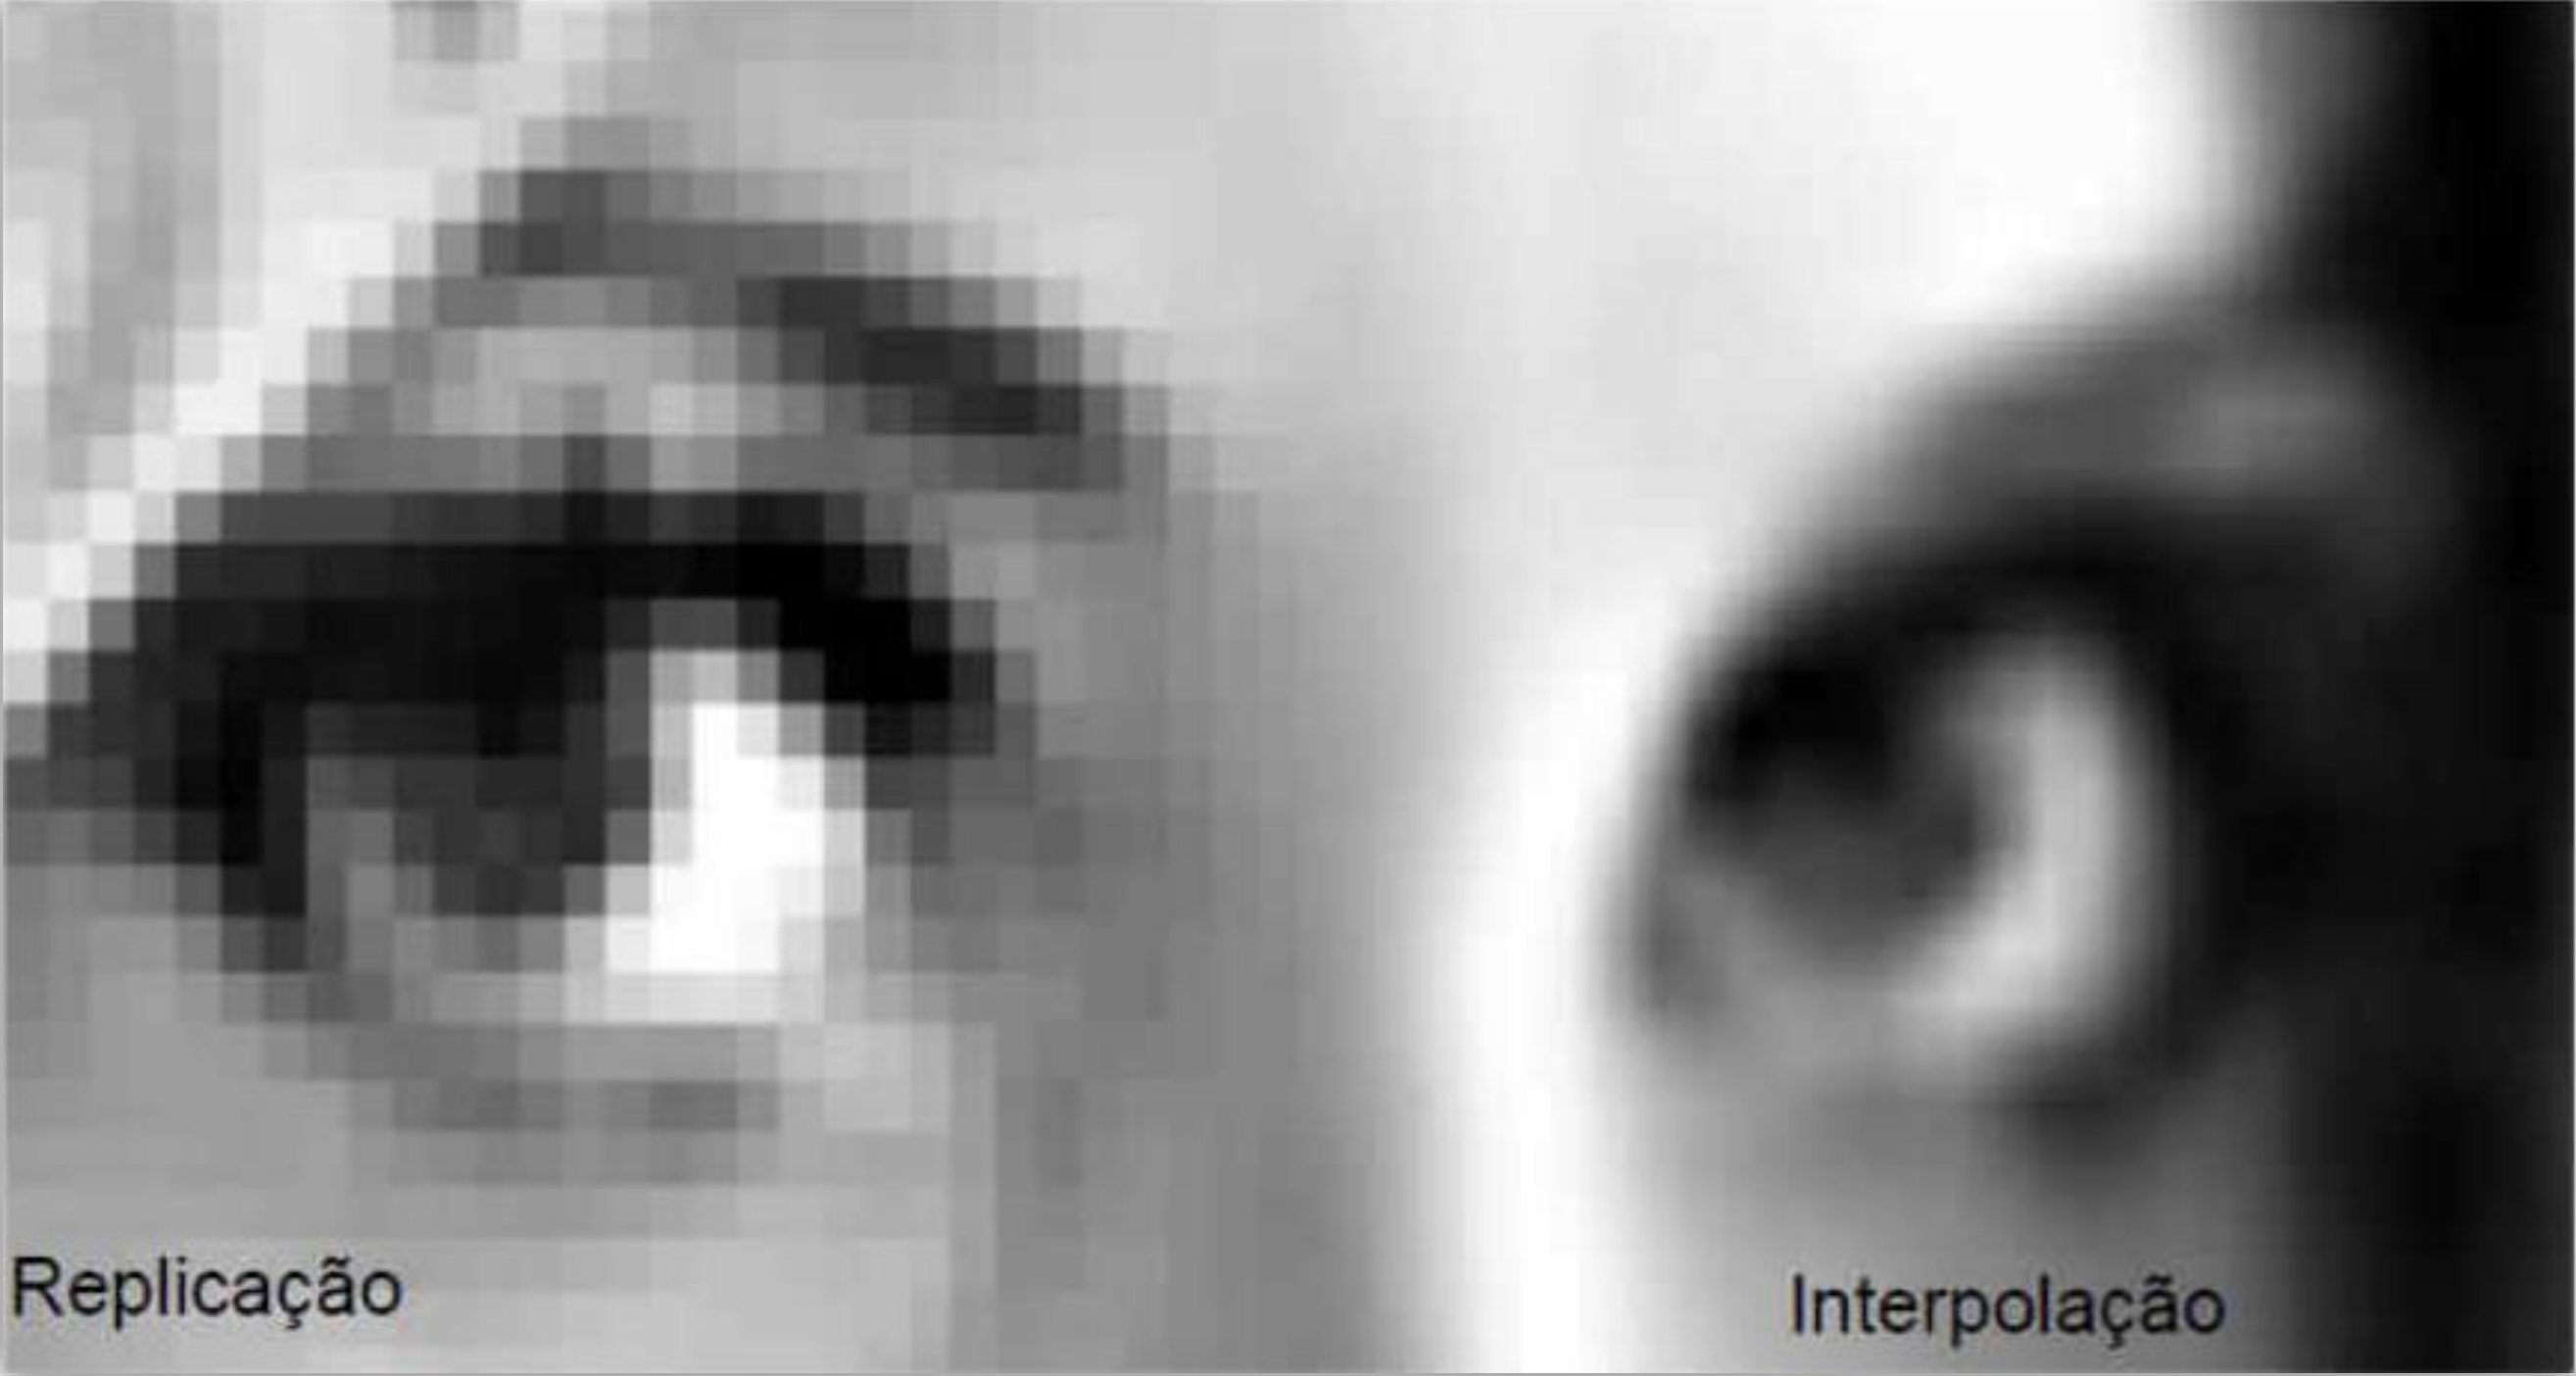

## Exercícios

1. Crie uma função `mirror`, que recebe `img` (`np.array`), `reverse_x` (`bool`) e `reverse_y` (`bool`) e retorna uma nova imagem, onde caso `reverse_EIXO` seja verdadeiro, esta deve ser `img` espelhada em EIXO. Em seguida, teste sua função com uma imagem de sua escolha.

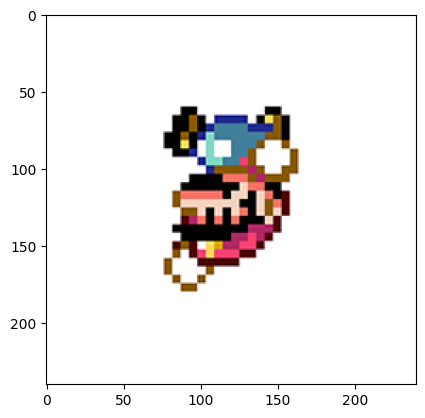

In [23]:
def mirror(img, reverse_x, reverse_y):
    if reverse_x:
        img = np.flip(img, axis=1)
    if reverse_y:
        img = np.flip(img, axis=0)
        
    return img

plt.imshow(mirror(mario, reverse_x=True, reverse_y=True))

2. Escolha uma imagem qualquer e realize um cisalhamento nela, sendo os fatores de sua escolha.

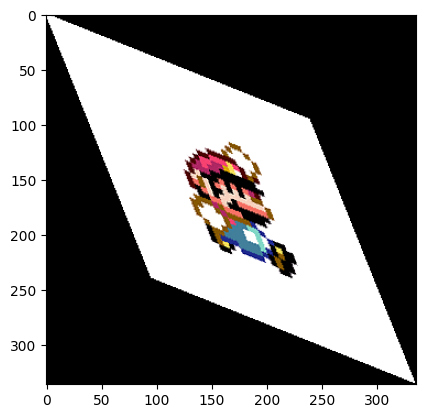

In [26]:
def shear(img, shear_x, shear_y):
    h, w, _ = img.shape
    novo_w = int(w + shear_x * h)
    novo_h = int(h + shear_y * w)
    
    imagem = np.zeros((novo_h, novo_w, 3), dtype=np.uint8)
    
    for y in range(h):
        for x in range(w):
            novo_x = int(x + shear_x * y)
            novo_y = int(y + shear_y * x)
            if 0 <= novo_x < novo_w and 0 <= novo_y < novo_h:
                imagem[novo_y, novo_x] = img[y, x]
    
    return imagem

plt.imshow(shear(mario, shear_x=0.4, shear_y=0.4))

3. **(Desafio)** Escreva uma função que realize uma mudança de escala por interpolação bilinear em uma imagem.

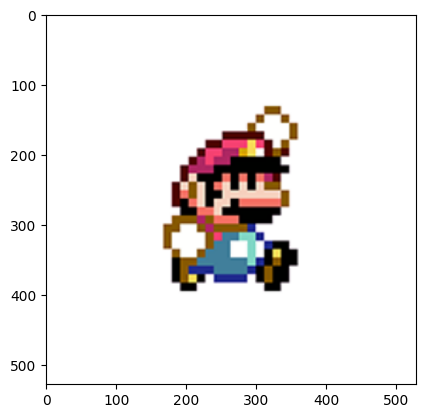

In [30]:
def redimensionar_bilinear(img, escala_x, escala_y):
    altura, largura, canais = img.shape
    nova_altura, nova_largura = int(altura * escala_y), int(largura * escala_x)
    img_redimensionada = np.zeros((nova_altura, nova_largura, canais), dtype=np.uint8)
    
    for i in range(nova_altura):
        for j in range(nova_largura):
            x = j / escala_x
            y = i / escala_y
            
            x0 = int(x)
            y0 = int(y)
            x1 = min(x0 + 1, largura - 1)
            y1 = min(y0 + 1, altura - 1)
            
            dx = x - x0
            dy = y - y0
            
            topo = (1 - dx) * img[y0, x0] + dx * img[y0, x1]
            base = (1 - dx) * img[y1, x0] + dx * img[y1, x1]
            
            img_redimensionada[i, j] = (1 - dy) * topo + dy * base
    
    return img_redimensionada

plt.imshow(redimensionar_bilinear(mario, escala_x=2.2, escala_y=2.2))